<a href="https://colab.research.google.com/github/Rin4797/Data_Augmentation_Research/blob/main/drafts/Augmentation_beginning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14488335935074341510
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14328594432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 165216229487853230
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
# загрузка файла с классом для визуализации

from google.colab import files
files.upload()

import sys
import os

py_file_location = "/content/visualization.py"
sys.path.append(os.path.abspath(py_file_location))

from visualization import DataVisualization, ModelVisualization, draw_dataframe

Saving visualization.py to visualization (1).py


# Датасет

## Загрузка датасета

In [4]:
!mkdir data
%cd data

mkdir: cannot create directory ‘data’: File exists
/content/data


In [5]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvf 'cifar-10-python.tar.gz'
!rm cifar-10-python.tar.gz

--2023-08-30 16:35:20--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  12.3MB/s    in 15s     

2023-08-30 16:35:35 (10.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [6]:
%cd cifar-10-batches-py
!ls
%cd ..
%cd ..

/content/data/cifar-10-batches-py
batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch
/content/data
/content


## Формирование данных

In [7]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [8]:
# список названия классов

cifar_label_data = unpickle('data/cifar-10-batches-py/batches.meta')
label_names = cifar_label_data[b'label_names']
for i in range(len(label_names)):
    label_names[i] = label_names[i].decode('ASCII')
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
def unpack_batch(batch_name):
    cifar_data = unpickle('data/cifar-10-batches-py/' + batch_name)
    data = cifar_data[b'data']
    labels = np.array(cifar_data[b'labels'])
    return data, labels

In [10]:
x_train = np.empty((0, 3072))
y_train = np.empty((0, ))
for i in range(5):
    data, labels = unpack_batch('data_batch_' + str(i + 1))
    x_train = np.concatenate((x_train, data), axis=0)
    y_train = np.concatenate((y_train, labels), axis=0)
print(x_train.shape, y_train.shape)

(50000, 3072) (50000,)


In [11]:
x_test, y_test = unpack_batch('test_batch')
print(x_test.shape, y_test.shape)

(10000, 3072) (10000,)


In [12]:
data = DataVisualization(label_names, x_train, y_train, x_test, y_test)

In [13]:
data.shuffle_data()
data.make_val(1000)
data.make_data()

## Описание датасета

In [14]:
data.make_data_stat()

In [15]:
data.size_data_analysis()

,name,size,std
0,train,49000,8.5557
1,val,1000,8.5557
2,test,10000,0.0000


In [16]:
data.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,4905,4895,4890,4900,4912,4899,4906,4886,4913,4894
1,val,95,105,110,100,88,101,94,114,87,106
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


## Уменьшенный датасет

In [17]:
sample_size = int(x_train.shape[0] * 0.2)

indexes = np.random.choice(x_train.shape[0], sample_size, replace=False)

In [18]:
data1 = DataVisualization(label_names, x_train[indexes], y_train[indexes], x_test, y_test)

In [19]:
data1.make_val(int(data1.x_train.shape[0] * 0.02))
data1.make_data()

In [20]:
data1.make_data_stat()

In [21]:
data1.size_data_analysis()

,name,size,std
0,train,9800,39.433488
1,val,200,4.024922
2,test,10000,0.000000


In [22]:
data1.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,937,1050,998,1011,1037,942,955,942,953,975
1,val,19,17,28,23,21,14,21,17,24,16
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


## Аугментация

### Augmentation as a layes

#### Resize and rescale

In [23]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(32, 32),
  tf.keras.layers.Rescaling(1./255)
])

#### Random rotate and flip

In [24]:
random_rotate_and_flip = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.4),
])

### Augmentation with dataset

In [25]:
def image_format(image_data):
    return (np.transpose(image_data.reshape(32, 32, 3, order='F'), axes=[1,0,2]))

In [26]:
small_dataset = data1.x_train.tolist()
for i in range(len(small_dataset)):
    small_dataset[i] = image_format(np.array(small_dataset[i]))
small_dataset = np.array(small_dataset)
small_dataset.shape

(9800, 32, 32, 3)

#### Flip left to right

In [27]:
flipped = tf.image.flip_left_right(small_dataset)

#### Grayscale

In [28]:
grayscaled = tf.image.rgb_to_grayscale(small_dataset)

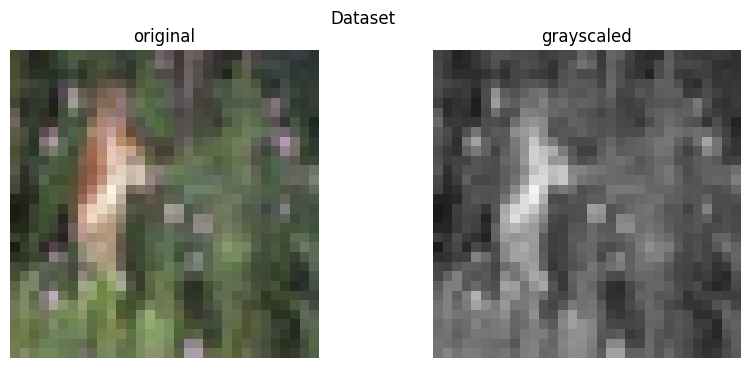

In [29]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace=0.3)
plt.imshow(small_dataset[2] / 255)
plt.title("original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace=0.3)
plt.imshow(np.concatenate((grayscaled[2], grayscaled[2], grayscaled[2]), axis=2) / 255)
plt.title("grayscaled")
plt.axis('off')

_ = plt.suptitle("Dataset")

In [30]:
grayscaled = np.concatenate((grayscaled, grayscaled, grayscaled), axis=3)
grayscaled.shape

(9800, 32, 32, 3)

#### Adjusting the saturation

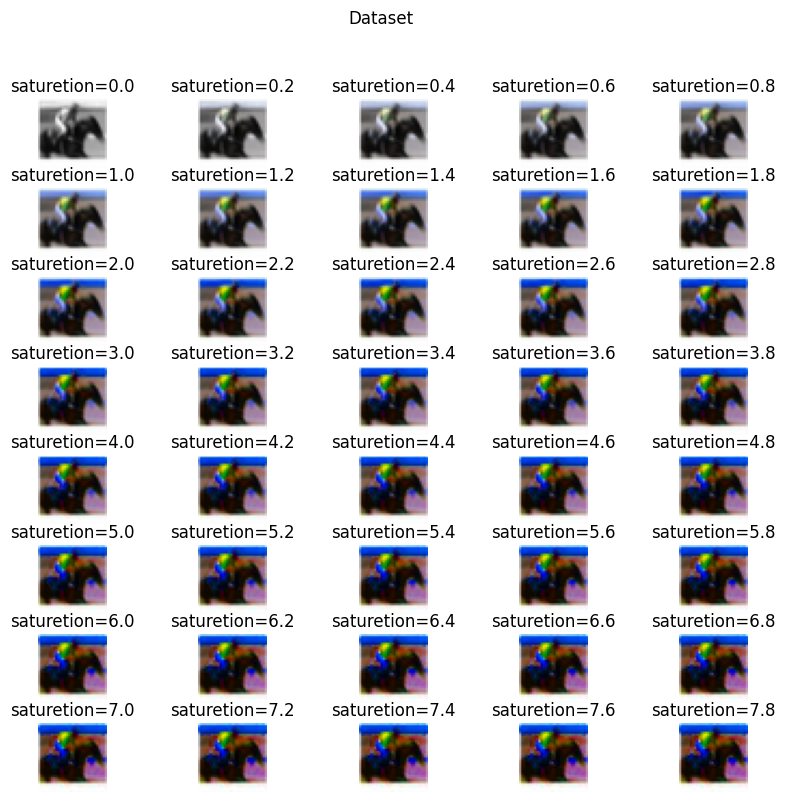

In [31]:
image = small_dataset[0]

plt.figure(figsize=(10, 9))
for n in range(40):
    plt.subplot(8, 5, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(tf.image.adjust_saturation(image, n/5) / 255)
    plt.title("saturetion=" + str(n/5))
    plt.axis('off')
_ = plt.suptitle("Dataset")

In [32]:
saturated = np.empty((0, 32, 32, 3))
for i in range(9):
    saturated = np.concatenate((saturated, tf.image.adjust_saturation(small_dataset, i / 2)), axis=0)
saturated.shape

(88200, 32, 32, 3)

#### Adjusting the brightness

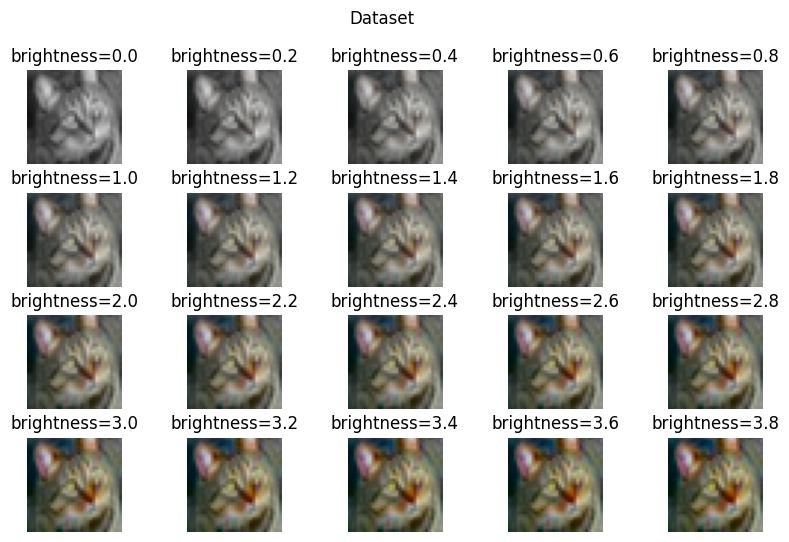

In [33]:
image = small_dataset[1]

plt.figure(figsize=(10, 6))
for n in range(20):
    plt.subplot(4, 5, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(tf.image.adjust_saturation(image, n/5) / 255)
    plt.title("brightness=" + str(n/5))
    plt.axis('off')
_ = plt.suptitle("Dataset")

In [34]:
bright = np.empty((0, 32, 32, 3))
for i in range(7):
    bright = np.concatenate((bright, tf.image.adjust_brightness(small_dataset, i / 2)), axis=0)
bright.shape

(68600, 32, 32, 3)

### Augmentated data

In [35]:
print(small_dataset.shape, flipped.shape, grayscaled.shape, saturated.shape, bright.shape)

(9800, 32, 32, 3) (9800, 32, 32, 3) (9800, 32, 32, 3) (88200, 32, 32, 3) (68600, 32, 32, 3)


In [36]:
augmented_dataset = np.concatenate((small_dataset, flipped, grayscaled, saturated, bright), axis=0).reshape(186200, 3072)

In [37]:
augmented_dataset_train = np.tile(data1.y_train, (1 + 1 + 1 + 9 + 7))
augmented_dataset_train.shape

(186200,)

In [38]:
data2 = DataVisualization(label_names, augmented_dataset, augmented_dataset_train, x_test, y_test)

In [52]:
data2.make_val(int(data1.x_train.shape[0] * 0.02))
data2.make_data()

In [56]:
data2.make_data_stat()

In [57]:
data2.size_data_analysis()

,name,size,std
0,train,186004,750.331020
1,val,196,3.903844
2,test,10000,0.000000


In [58]:
data2.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,17789,19931,18941,19191,19686,17871,18121,17877,18086,18511
1,val,14,19,21,18,17,27,24,21,21,14
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


# Нейросети

## MobileNet

In [39]:
model = tf.keras.applications.MobileNet(
    input_shape=(32, 32, 3), #image_size
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=10, #cifar-10
    classifier_activation="softmax"
)

In [40]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 16, 16, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 16, 16, 32)       128       
 ation)                                          

## MobileNet c аугментацией

In [42]:
model1 = tf.keras.Sequential([
    resize_and_rescale,
    random_rotate_and_flip,
    model
])

In [43]:
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model1.build((None, 32, 32, 3))

In [44]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 mobilenet_1.00_32 (Function  (None, 10)               3239114   
 al)                                                             
                                                                 
Total params: 3,239,114
Trainable params: 3,217,226
Non-trainable params: 21,888
_________________________________________________________________


# Работа моделей

In [45]:
def run_model(model_work, epochs_num):
    model_work.model_fit(epochs_num)
    model_work.draw_model_plot()
    model_work.draw_model_results()

In [46]:
def result_model(model_work):
    model_work.make_predictions()
    model_work.draw_confusion_matrix()
    draw_dataframe(model_work.metrics(), 'model_results')

## MobileNet на исходном датасете

In [49]:
model_work = ModelVisualization(model, data)

Epoch 1/50
766/766 [==============================] - 32s 14ms/step - loss: 1.9457 - accuracy: 0.2809 - val_loss: 1.7695 - val_accuracy: 0.3400
Epoch 2/50
766/766 [==============================] - 10s 13ms/step - loss: 1.5753 - accuracy: 0.4267 - val_loss: 1.6336 - val_accuracy: 0.4430
Epoch 3/50
766/766 [==============================] - 10s 13ms/step - loss: 1.4217 - accuracy: 0.4930 - val_loss: 1.5748 - val_accuracy: 0.4520
Epoch 4/50
766/766 [==============================] - 10s 13ms/step - loss: 1.2769 - accuracy: 0.5461 - val_loss: 1.3029 - val_accuracy: 0.5490
Epoch 5/50
766/766 [==============================] - 10s 13ms/step - loss: 1.1686 - accuracy: 0.5866 - val_loss: 1.4703 - val_accuracy: 0.5130
Epoch 6/50
766/766 [==============================] - 10s 13ms/step - loss: 1.1402 - accuracy: 0.5999 - val_loss: 1.1093 - val_accuracy: 0.6030
Epoch 7/50
766/766 [==============================] - 10s 13ms/step - loss: 1.0461 - accuracy: 0.6361 - val_loss: 1.3872 - val_accuracy:

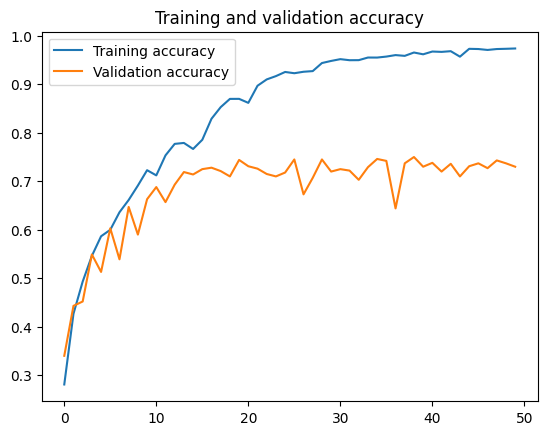

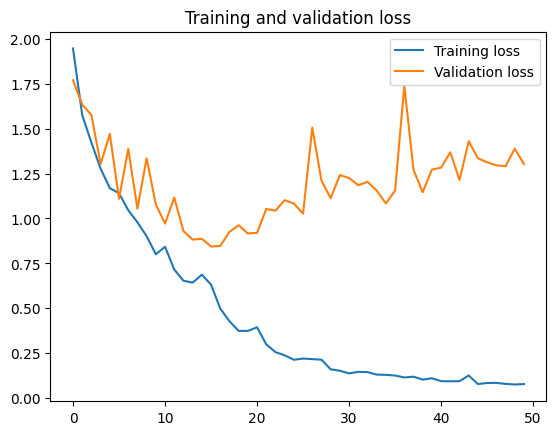

313/313 [==============================] - 2s 5ms/step - loss: 1.3144 - accuracy: 0.7309
Accuracy for test data :  0.73089998960495
Loss for test data :  1.314444661140442


In [50]:
run_model(model_work, 50)

157/157 [==============================] - 1s 3ms/step


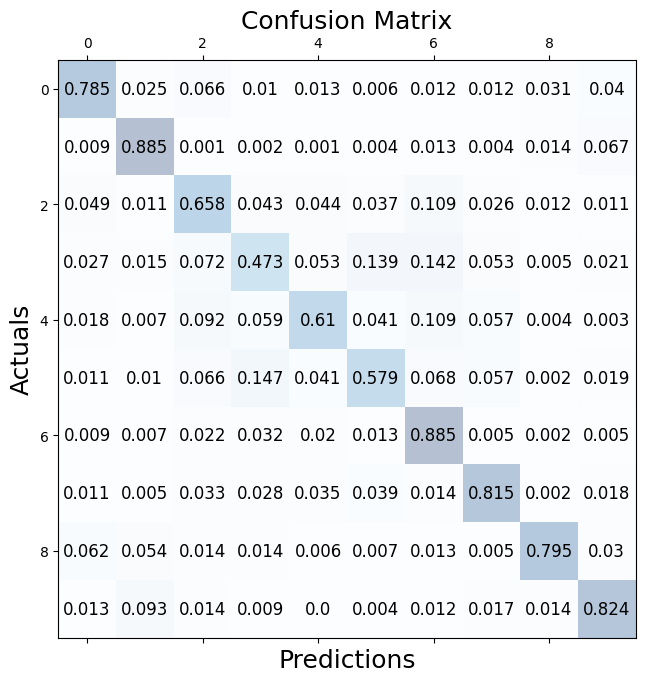

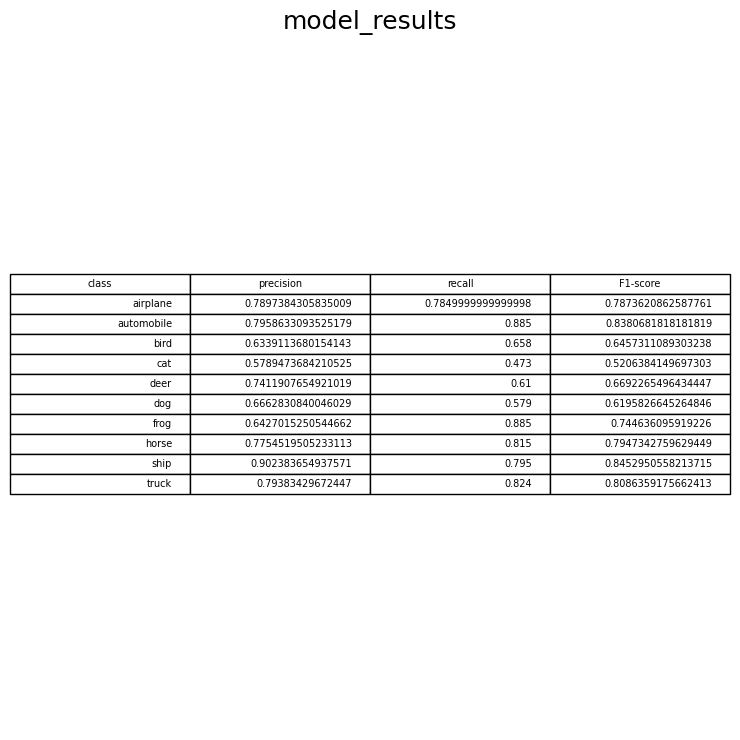

In [51]:
result_model(model_work)

## MobileNet на усеченном датасете

In [52]:
model1_work = ModelVisualization(model, data1)

Epoch 1/10
154/154 [==============================] - 2s 14ms/step - loss: 0.0817 - accuracy: 0.9762 - val_loss: 0.0550 - val_accuracy: 0.9750
Epoch 2/10
154/154 [==============================] - 2s 13ms/step - loss: 0.0925 - accuracy: 0.9710 - val_loss: 0.1238 - val_accuracy: 0.9450
Epoch 3/10
154/154 [==============================] - 2s 13ms/step - loss: 0.0683 - accuracy: 0.9778 - val_loss: 0.1148 - val_accuracy: 0.9650
Epoch 4/10
154/154 [==============================] - 2s 14ms/step - loss: 0.0245 - accuracy: 0.9913 - val_loss: 0.1118 - val_accuracy: 0.9550
Epoch 5/10
154/154 [==============================] - 2s 13ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.1363 - val_accuracy: 0.9600
Epoch 6/10
154/154 [==============================] - 2s 13ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.1613 - val_accuracy: 0.9300
Epoch 7/10
154/154 [==============================] - 2s 13ms/step - loss: 0.0832 - accuracy: 0.9736 - val_loss: 0.1540 - val_accuracy: 0.9250

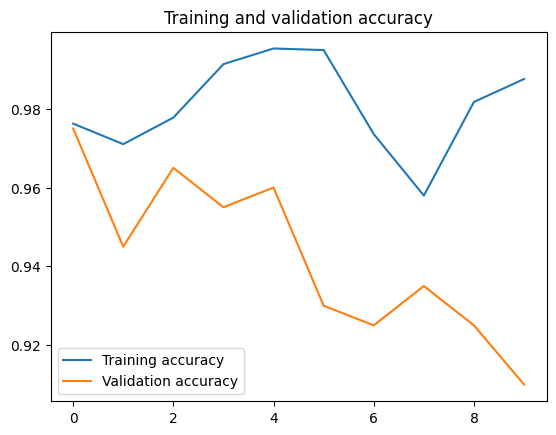

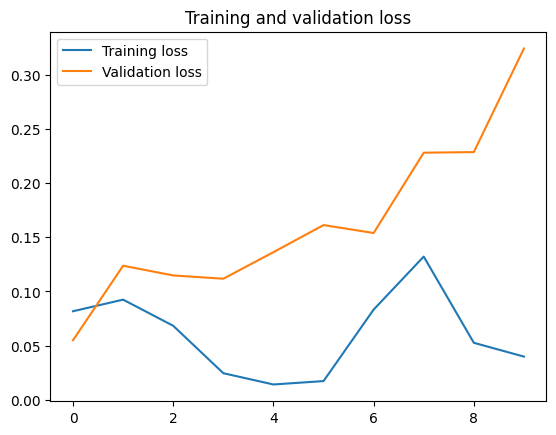

313/313 [==============================] - 1s 4ms/step - loss: 1.4318 - accuracy: 0.7329
Accuracy for test data :  0.7329000234603882
Loss for test data :  1.4318112134933472


In [53]:
run_model(model1_work, 50)

157/157 [==============================] - 1s 3ms/step


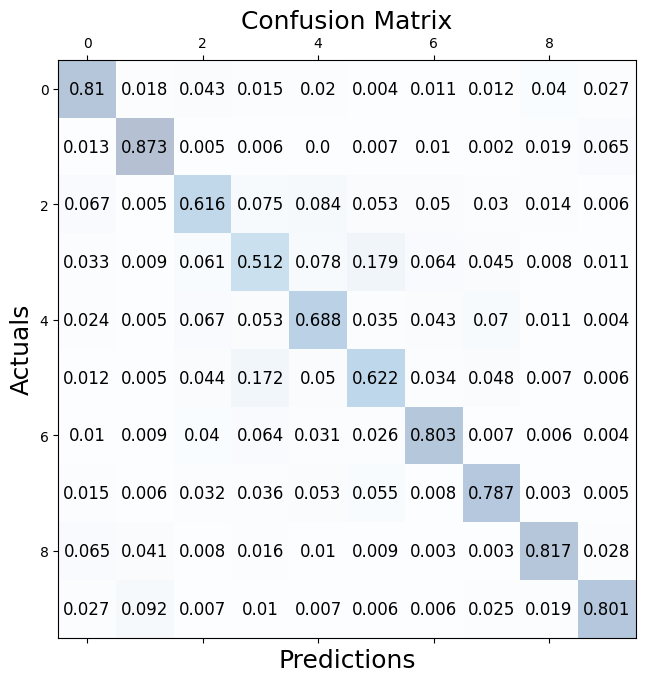

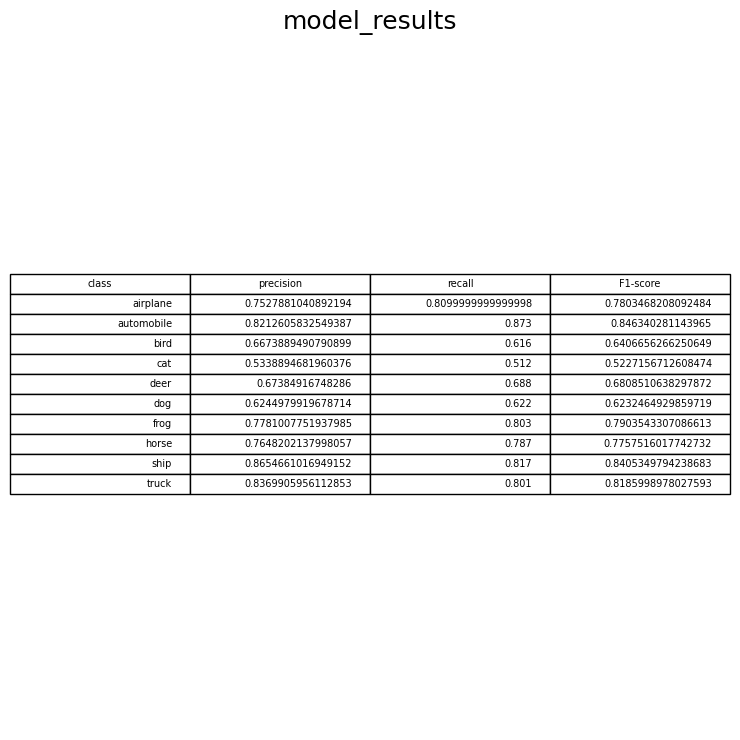

In [54]:
result_model(model1_work)

## MobileNet на усеченном датасете с аугментацией. Аугментация проводится в модели.

In [55]:
model2_work = ModelVisualization(model1, data1)

Epoch 1/50
154/154 [==============================] - 17s 18ms/step - loss: 2.6320 - accuracy: 0.3744 - val_loss: 4.5721 - val_accuracy: 0.1150
Epoch 2/50
154/154 [==============================] - 2s 15ms/step - loss: 1.6480 - accuracy: 0.4105 - val_loss: 4.3134 - val_accuracy: 0.1150
Epoch 3/50
154/154 [==============================] - 2s 14ms/step - loss: 1.5726 - accuracy: 0.4340 - val_loss: 3.9908 - val_accuracy: 0.1150
Epoch 4/50
154/154 [==============================] - 2s 14ms/step - loss: 1.5431 - accuracy: 0.4468 - val_loss: 3.5020 - val_accuracy: 0.1300
Epoch 5/50
154/154 [==============================] - 2s 14ms/step - loss: 1.5404 - accuracy: 0.4472 - val_loss: 3.2001 - val_accuracy: 0.1700
Epoch 6/50
154/154 [==============================] - 2s 14ms/step - loss: 1.4979 - accuracy: 0.4590 - val_loss: 2.2013 - val_accuracy: 0.3950
Epoch 7/50
154/154 [==============================] - 2s 15ms/step - loss: 1.4681 - accuracy: 0.4726 - val_loss: 1.2996 - val_accuracy: 0.605

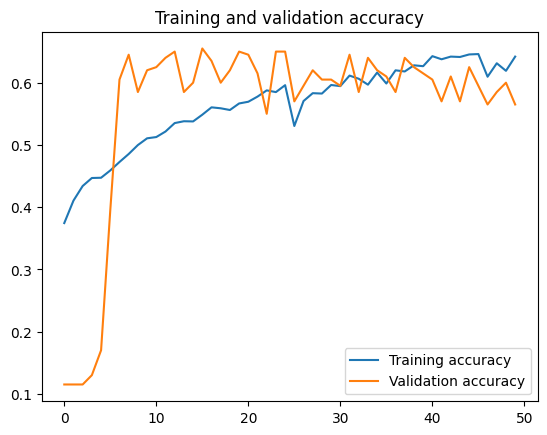

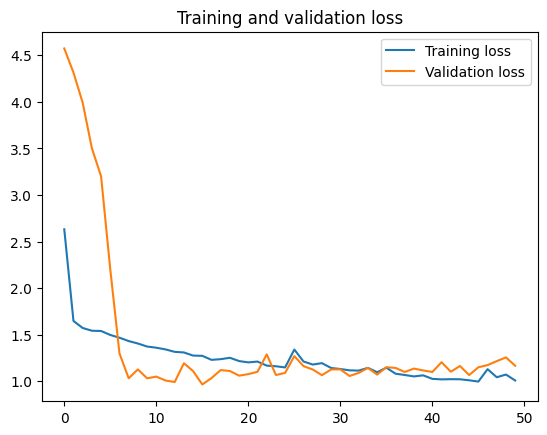

313/313 [==============================] - 2s 4ms/step - loss: 1.1569 - accuracy: 0.6043
Accuracy for test data :  0.6043000221252441
Loss for test data :  1.1569205522537231


In [56]:
run_model(model2_work, 50)

157/157 [==============================] - 1s 4ms/step


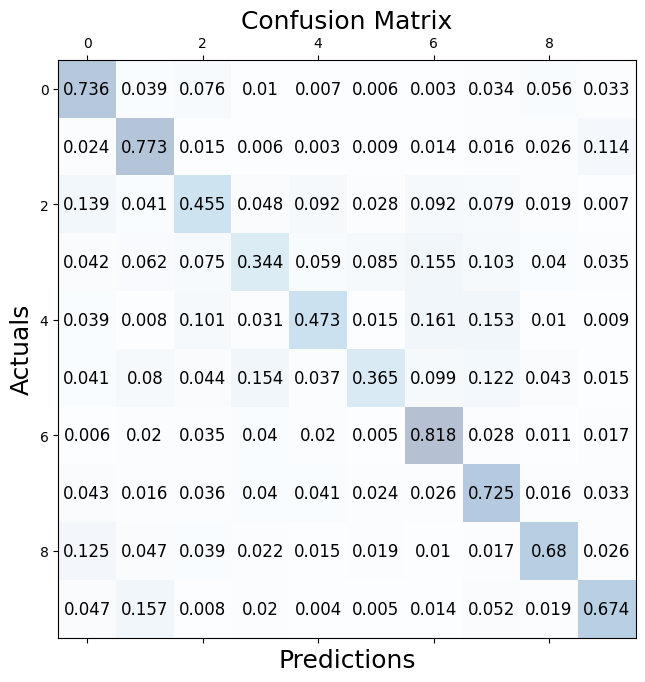

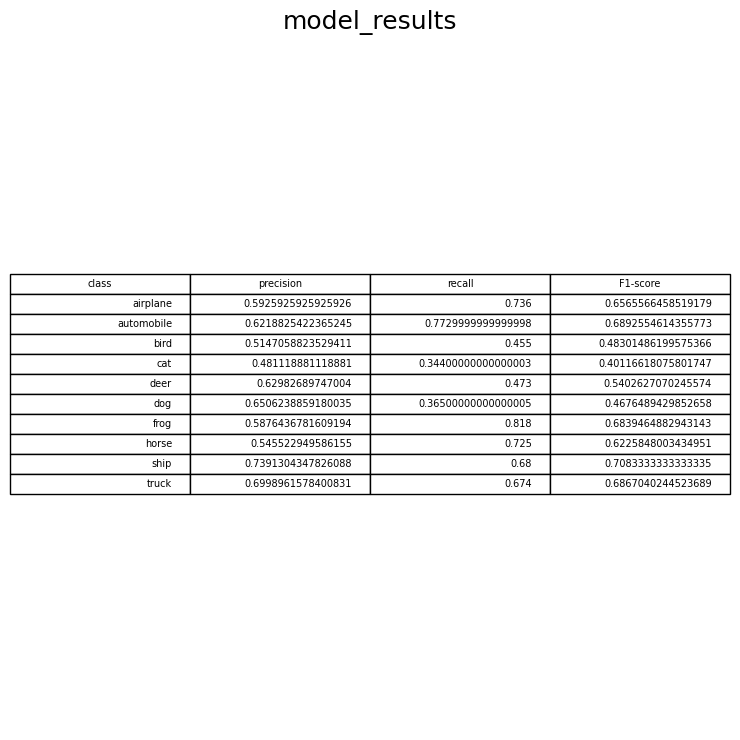

In [57]:
result_model(model2_work)

## MobileNet на усеченном датасете с аугментацией. Аугментация проводится в датасете.

In [59]:
model3_work = ModelVisualization(model, data2)

Epoch 1/50
2907/2907 [==============================] - 56s 14ms/step - loss: 1.6387 - accuracy: 0.4283 - val_loss: 1.3065 - val_accuracy: 0.5561
Epoch 2/50
2907/2907 [==============================] - 39s 13ms/step - loss: 1.1717 - accuracy: 0.6076 - val_loss: 0.7550 - val_accuracy: 0.7296
Epoch 3/50
2907/2907 [==============================] - 40s 14ms/step - loss: 0.7489 - accuracy: 0.7618 - val_loss: 0.3955 - val_accuracy: 0.8571
Epoch 4/50
2907/2907 [==============================] - 39s 14ms/step - loss: 0.4729 - accuracy: 0.8551 - val_loss: 0.2894 - val_accuracy: 0.9133
Epoch 5/50
2907/2907 [==============================] - 39s 13ms/step - loss: 0.3797 - accuracy: 0.8867 - val_loss: 0.1432 - val_accuracy: 0.9490
Epoch 6/50
2907/2907 [==============================] - 38s 13ms/step - loss: 0.3106 - accuracy: 0.9071 - val_loss: 0.0684 - val_accuracy: 0.9847
Epoch 7/50
2907/2907 [==============================] - 38s 13ms/step - loss: 0.2494 - accuracy: 0.9270 - val_loss: 0.0417 -

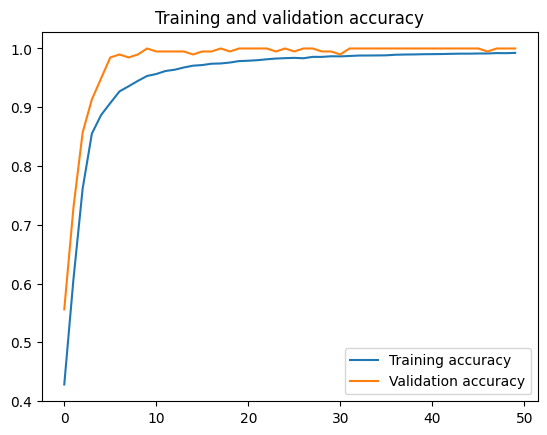

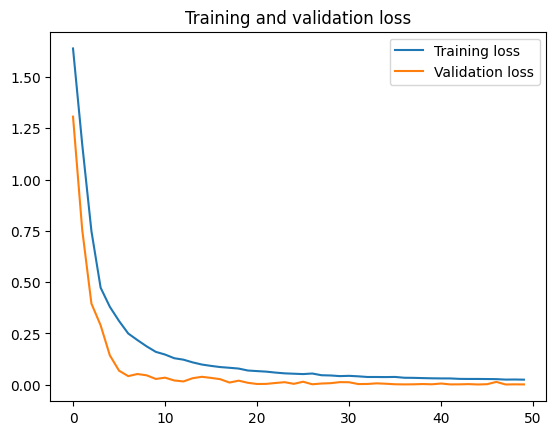

313/313 [==============================] - 2s 5ms/step - loss: 6.0111 - accuracy: 0.1192
Accuracy for test data :  0.11919999867677689
Loss for test data :  6.011115074157715


In [60]:
run_model(model3_work, 50)

157/157 [==============================] - 1s 3ms/step


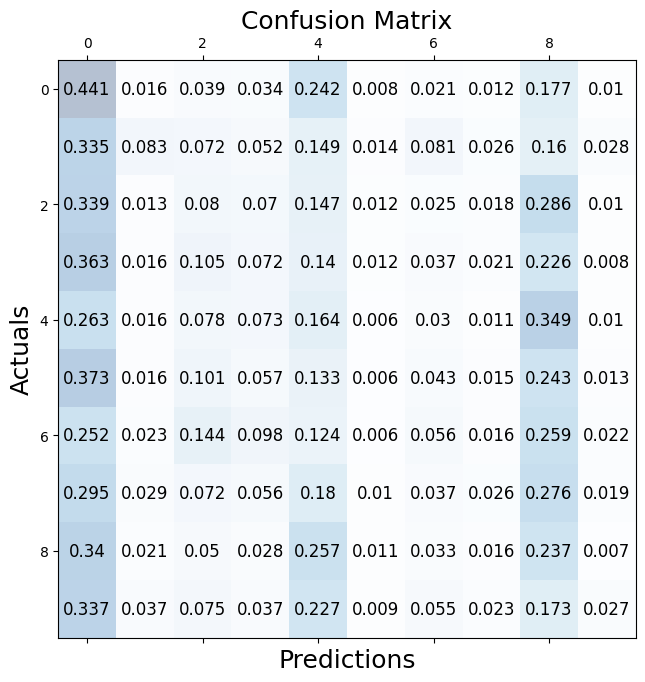

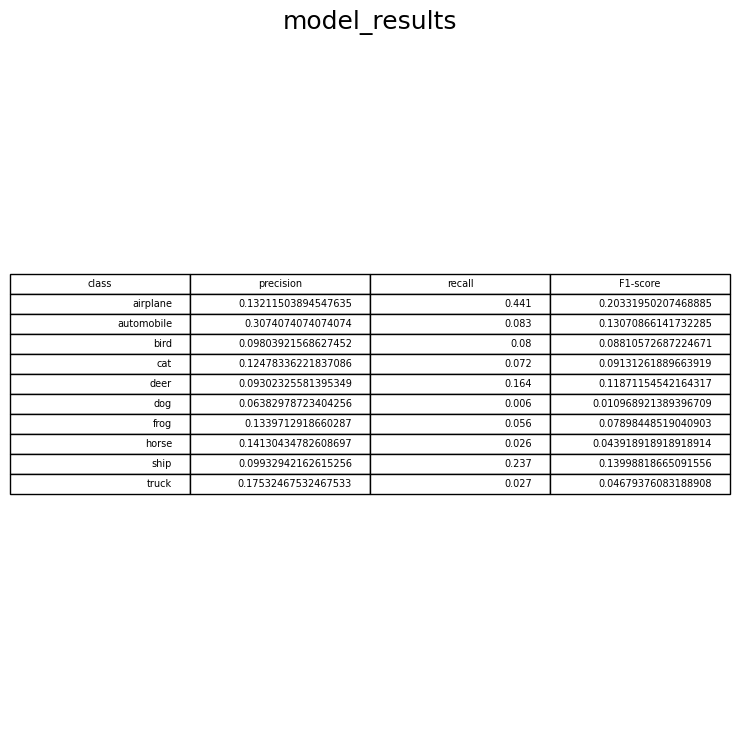

In [61]:
result_model(model3_work)